
## Use the following covid_19_india.csv dataset and perform following analytics on the given Dataset
### Dataset Link: https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india
### a. Describe the dataset
### b. Number of cases, cures and deaths
### c. Number of Indian Nationals vs Foreign Nationals
### d. States with Highest and Lowest cases, cures and deaths
### e. States with Lowest cases, cures and deaths


## 1. Problem Statement

## Importing all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
import warnings
get_ipython().run_line_magic('matplotlib', 'inline')

## 2. Data Collection
### Read the COVID 19 Dataset

In [2]:
df = pd.read_csv("covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [4]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

## 3. Exploratory Data Analysis

## Describing the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
df.describe(include="all")

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,18110.000000,18110,18110,18110,18110,18110,1.811000e+04,18110.000000,1.811000e+04
unique,NaN,560,7,46,62,12,NaN,NaN,NaN
top,NaN,2020-06-11,8:00 AM,Kerala,-,-,NaN,NaN,NaN
freq,NaN,37,16472,560,17664,17664,NaN,NaN,NaN
mean,9055.500000,NaN,NaN,NaN,NaN,NaN,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,NaN,NaN,NaN,NaN,NaN,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,NaN,NaN,NaN,NaN,NaN,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,NaN,NaN,NaN,NaN,NaN,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,NaN,NaN,NaN,NaN,NaN,2.788698e+05,3643.750000,3.001498e+05


In [7]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

## Checking for any null values

In [8]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

## Differentiating between Total Count of Indian vs Foreign National

In [9]:
df['ConfirmedIndianNational'].value_counts()

ConfirmedIndianNational
-      17664
1        108
3         73
2         33
4         21
       ...  
41         1
86         1
87         1
45         1
110        1
Name: count, Length: 62, dtype: int64

In [10]:
df['ConfirmedForeignNational'].value_counts()

ConfirmedForeignNational
-     17664
0       314
1        39
2        36
14       25
3        12
10        6
8         5
7         3
6         3
11        2
9         1
Name: count, dtype: int64

## Rename column

In [11]:
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

## Calculating active cases

In [12]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['%Cured']=(df['Cured']/df['Confirmed'])*100
df['%Deaths']=(df['Deaths']/df['Confirmed'])*100
df_latest = df[df['Date']=="2021-08-11"]
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)

## Replace States

In [13]:
df['States'] = df['States'].replace(['Maharashtra'],'MH')
df['States'] = df['States'].replace(['Kerala'],'KL')
df['States'] = df['States'].replace(['Karnataka'],'KA')
df['States'] = df['States'].replace(['Tamil Nadu'],'TN')
df['States'] = df['States'].replace(['Andhra Pradesh'],'AP')
df['States'] = df['States'].replace(['Uttar Pradesh'],'UP')
df['States'] = df['States'].replace(['Madhya Pradesh'],'MP')
df['States'] = df['States'].replace(['Karanataka'],'KA')
df['States'] = df['States'].replace(['West Bengal'],'WB')
df['States'] = df['States'].replace(['Himachal Pradesh'],'HP')
df['States'] = df['States'].replace(['Jammu and Kashmir'],'JNK')
df['States'].unique()

array(['KL', 'Telengana', 'Delhi', 'Rajasthan', 'UP', 'Haryana', 'Ladakh',
       'TN', 'KA', 'MH', 'Punjab', 'JNK', 'AP', 'Uttarakhand', 'Odisha',
       'Puducherry', 'WB', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'HP',
       'MP', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Maharashtra***'],
      dtype=object)

## Storing different States data in different Dataframes

In [14]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Uttar Pradesh', 'Madhya Pradesh','West Bengal' ]
MH=df[df['States']=='MH']
KL=df[df['States']=='KL']
KR=df[df['States']=='KA']
TN=df[df['States']=='TN']
AP=df[df['States']=='AP']
UP=df[df['States']=='UP']
WB=df[df['States']=='WB']
Delhi=df[df['States']=='Delhi']
Chhattisgarh=df[df['States']=='Chhattisgarh']
Odisha=df[df['States']=='Odisha']

## States with Highest and Lowest Number of Cases, Cures and Deaths

In [15]:
# Group the data by 'States' column and calculate the sum of 'Confirmed' cases
states_with_cases = df.groupby('States')['Confirmed'].sum()
states_with_cured = df.groupby('States')['Cured'].sum()
states_with_deaths = df.groupby('States')['Deaths'].sum()

### Cases

In [16]:
print("States with highest number of confirmed cases")
print(states_with_cases.sort_values(ascending=False).head())
print("==============================================")
print("States with lowest number of deaths")
print(states_with_cases.sort_values(ascending=True).head())

States with highest number of confirmed cases
States
MH    1121491467
KA     488855931
KL     458906023
TN     431928644
AP     392432753
Name: Confirmed, dtype: int64
States with lowest number of deaths
States
Daman & Diu                              2
Unassigned                             161
Dadra and Nagar Haveli               20722
Himanchal Pradesh                   204516
Cases being reassigned to states    345565
Name: Confirmed, dtype: int64


### Cures

In [17]:
print("States with highest number of cured cases")
print(states_with_cured.sort_values(ascending=False).head())
print("==============================================")
print("States with lowest number of deaths")
print(states_with_cured.sort_values(ascending=True).head())

States with highest number of cured cases
States
MH    1018765039
KA     444665851
KL     420174235
TN     404095807
AP     370426530
Name: Cured, dtype: int64
States with lowest number of deaths
States
Cases being reassigned to states         0
Unassigned                               0
Daman & Diu                              0
Dadra and Nagar Haveli               20352
Himanchal Pradesh                   200040
Name: Cured, dtype: int64


### Deaths

In [18]:
print("States with highest number of deaths")
print(states_with_deaths.sort_values(ascending=False).head())
print('==============================================')
print("States with lowest number of deaths")
print(states_with_deaths.sort_values(ascending=True).head())

States with highest number of deaths
States
MH       23737432
KA        6089959
TN        5916658
Delhi     4943294
UP        4143450
Name: Deaths, dtype: int64
States with lowest number of deaths
States
Cases being reassigned to states               0
Unassigned                                     0
Daman & Diu                                    0
Dadra and Nagar Haveli                         8
Dadra and Nagar Haveli and Daman and Diu    1014
Name: Deaths, dtype: int64


In [19]:
df_group_by_date =  df.groupby('Date').agg({
    'States': ', '.join,
    'Cured': 'sum',
    'Deaths': 'sum',
    'Confirmed': 'sum'
}).reset_index()
df_group_by_date.head()

,Date,States,Cured,Deaths,Confirmed
0,2020-01-30,KL,0,0,1
1,2020-01-31,KL,0,0,1
2,2020-02-01,KL,0,0,2
3,2020-02-02,KL,0,0,3
4,2020-02-03,KL,0,0,3


In [20]:
df_group_by_date[df_group_by_date['Date']=="2021-08-11"]

,Date,States,Cured,Deaths,Confirmed
559,2021-08-11,"Andaman and Nicobar Islands, AP, Arunachal Pra...",31220981,429179,32036511


In [ ]:
df2= df_latest.copy()

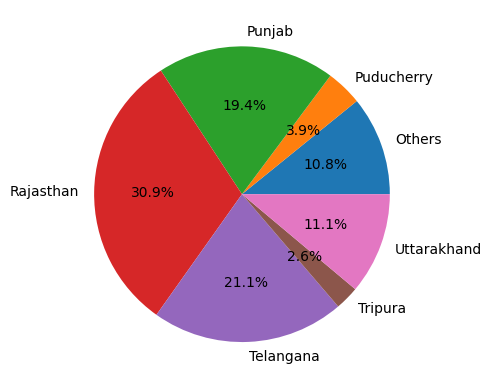

In [104]:
# Select the rows that are not in the top 7
df3 = df_latest.copy()
df3 = df3.sort_values(by=['Confirmed'], ascending = False)
df3 = df3.iloc[10:, :]

# Calculate the total number of Confirmed for the rows that are not in the top 7
total_others = df3["Confirmed"].sum()

# Mark all the states as "Others" where the Confirmed cases are less than 3% of the total cases
df3.loc[df3["Confirmed"] < (0.01 * total_others), "States"] = "Others"

# group the states and sum the fields while maintaining the columns in the dataset
df3 = df3.groupby("States").agg({
    "Confirmed": "sum",
    "Cured": "sum",
    "Deaths": "sum"
}).reset_index()


# df3 = df3.groupby("States").sum()
# Create a new DataFrame with the top 7 rows and the "others" row
df_new = pd.concat([df3], ignore_index=True)

df_new = df_new.iloc[10:, :]
# Plot the pie chart
plt.pie(df_new["Confirmed"], labels=df_new["States"], autopct="%1.1f%%")

# Show the plot
plt.show()

## Comparing Total Number of Confirmed Cases, Cured, and Deaths between States like Maharashtra, Gujarat, etc

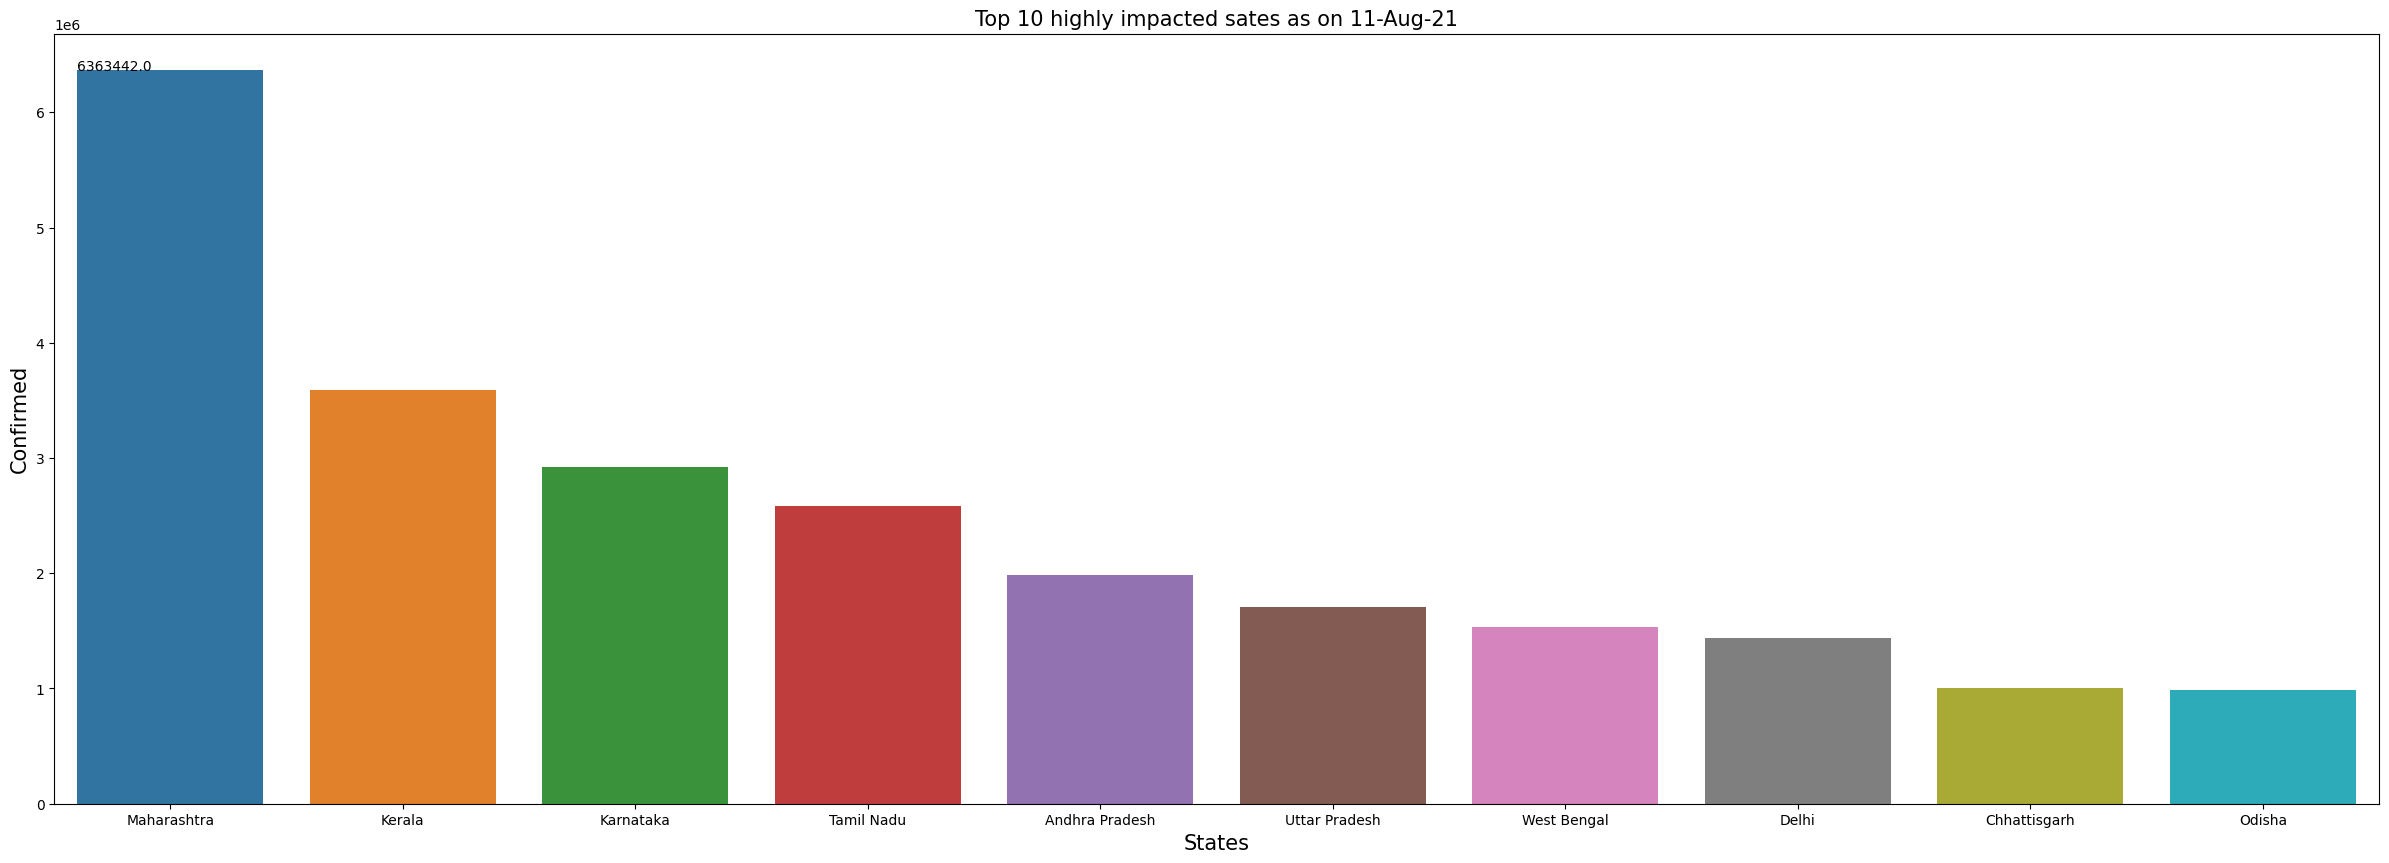

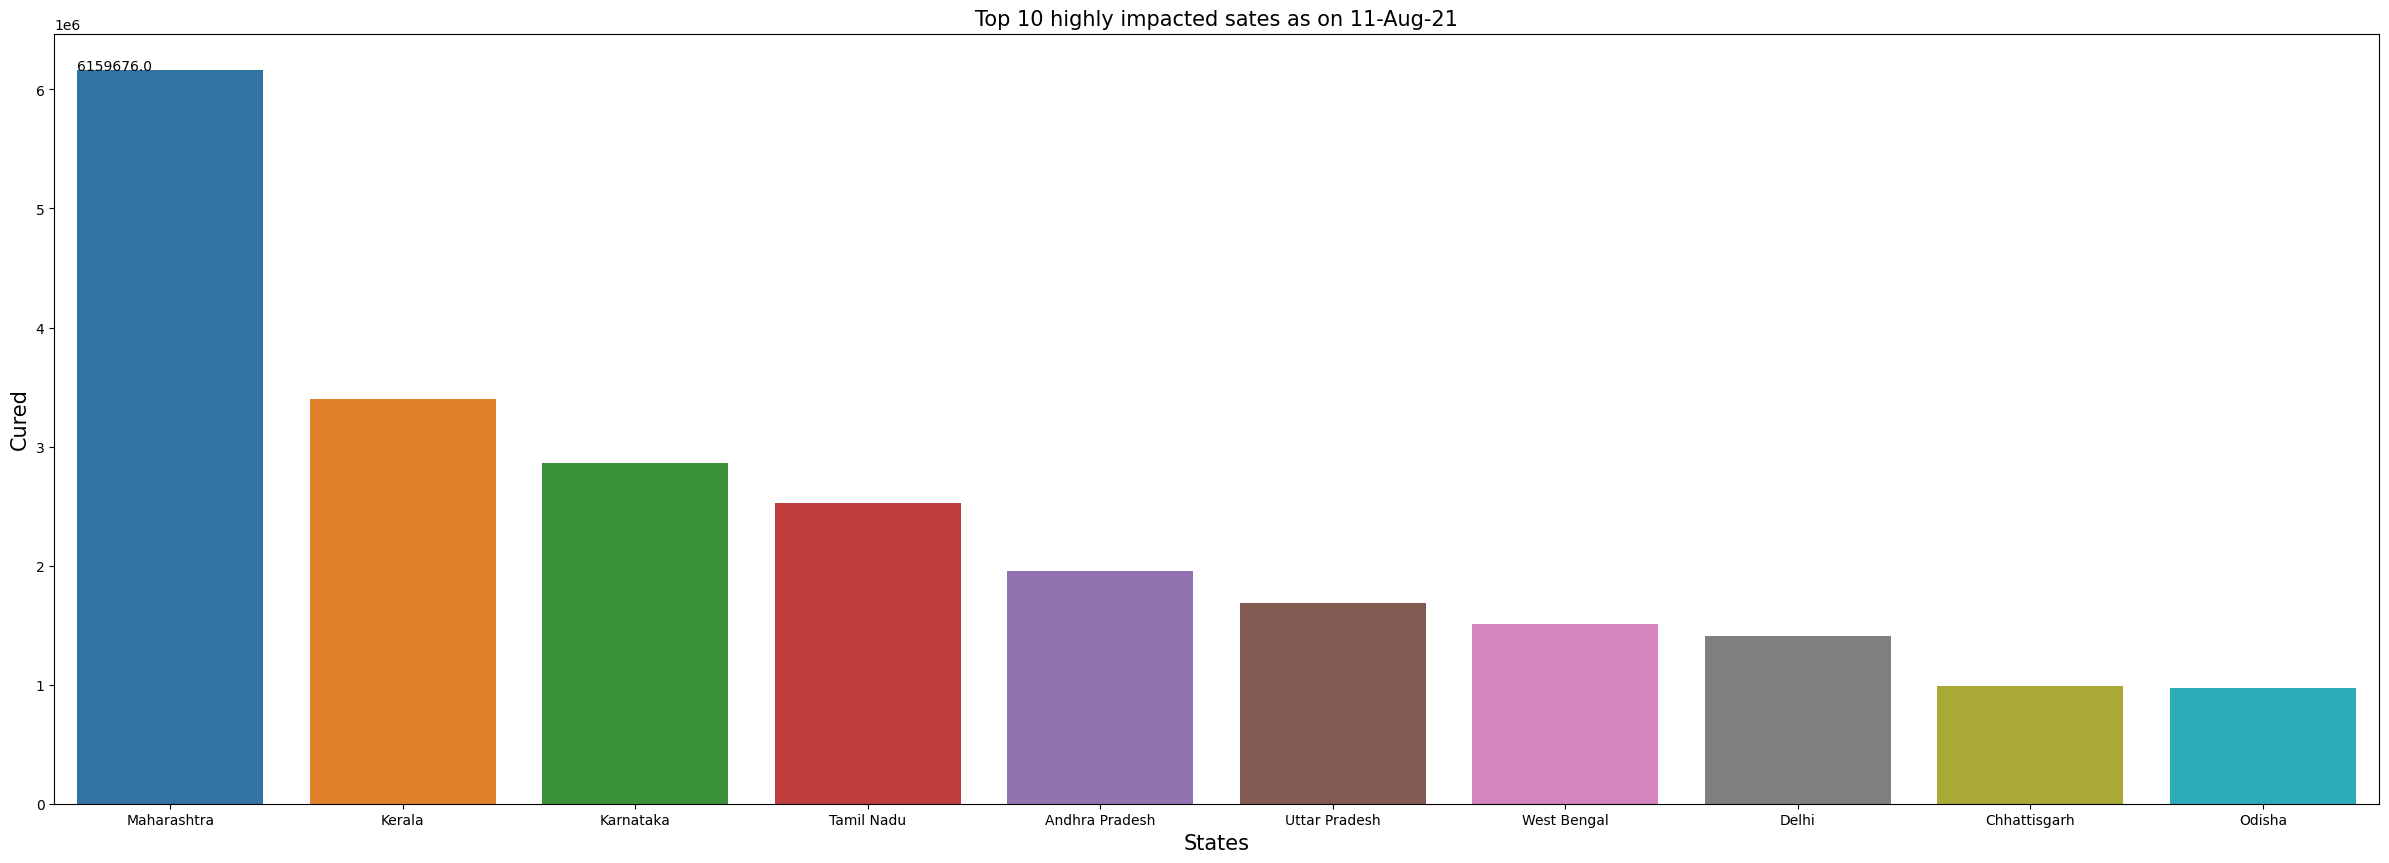

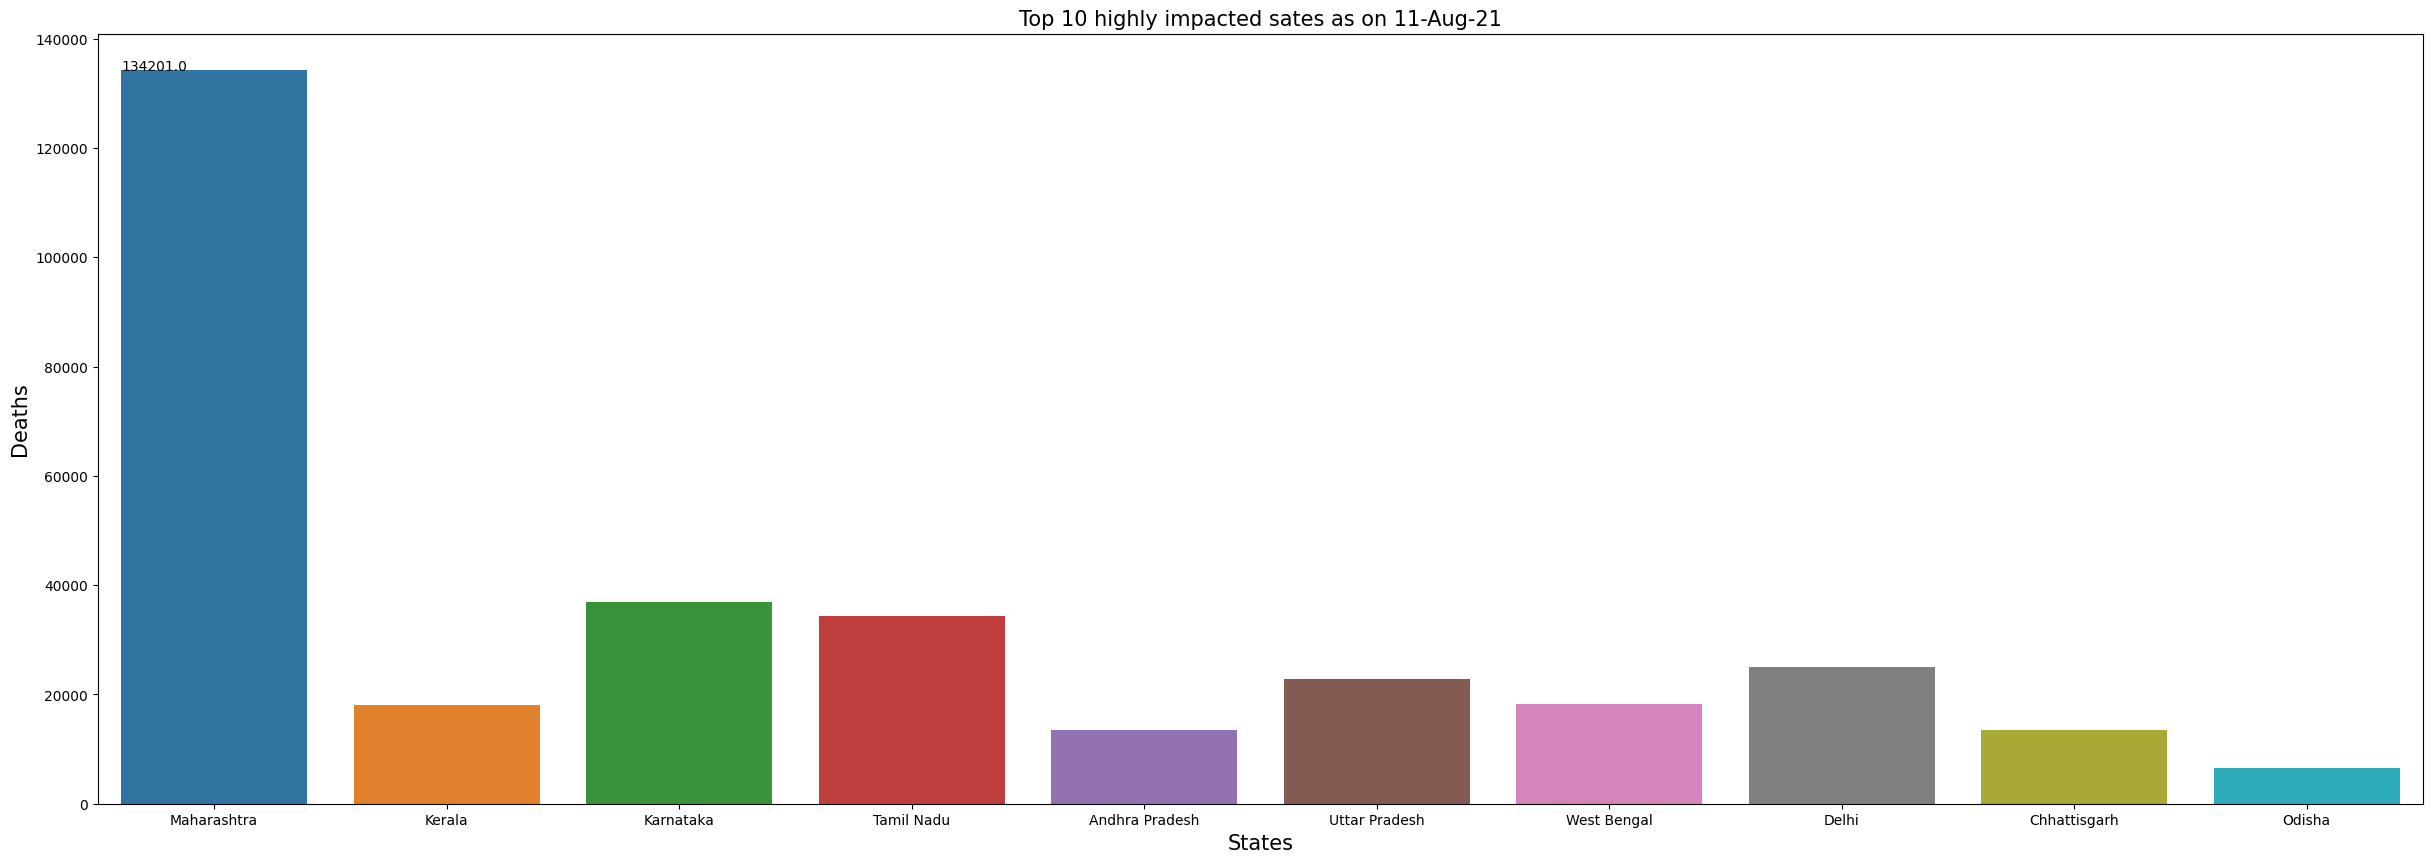

In [106]:
df2 = df2.sort_values(by=['Confirmed'], ascending = False)
df2_filtered = df2.iloc[:10, :]
for feature in df2_filtered[['Confirmed','Cured','Deaths']]:
    fig=plt.figure(figsize=(30,10))
    plt.title("Top 10 highly impacted sates as on 11-Aug-21", size=15)
    ax=sns.barplot(data=df2_filtered,y=df2_filtered[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
        plt.show()

## Comparing top 8 states with highest confirmed cases

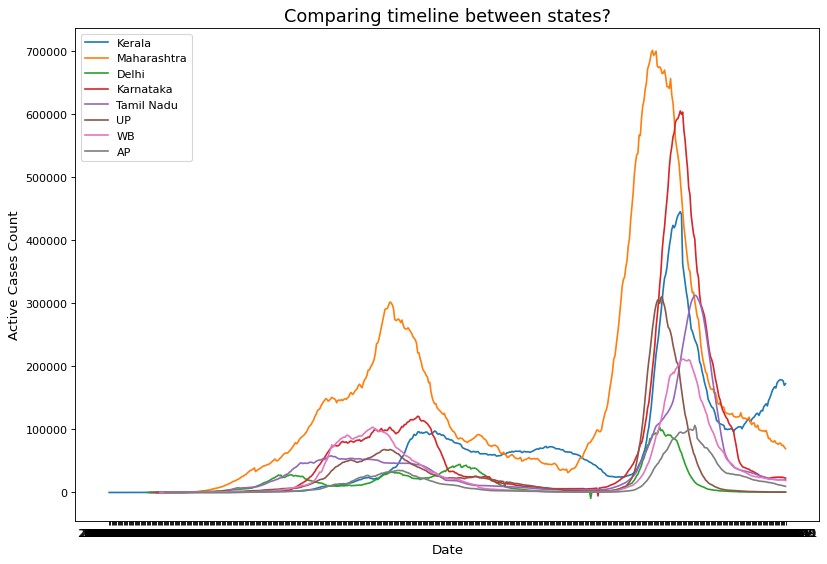

In [29]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(KL['Date'], KL['Active_cases'])
plt.plot(MH['Date'], MH['Active_cases'])
plt.plot(Delhi['Date'], Delhi['Active_cases'])
plt.plot(KR['Date'], KR['Active_cases'])
plt.plot(TN['Date'], TN['Active_cases'])
plt.plot(UP['Date'], UP['Active_cases'])
plt.plot(AP['Date'], AP['Active_cases'])
plt.plot(Odisha['Date'], Odisha['Active_cases'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'UP', 'WB', 'AP','Chhatisgarh','Odisha'], loc='upper left')
plt.xlabel('Date', size=12)
plt.ylabel('Active Cases Count', size=12)
plt.title('Comparing timeline between states?', size = 16)
plt.show()

## Change of Data with Cases over time

In [25]:
df3 = df.copy()

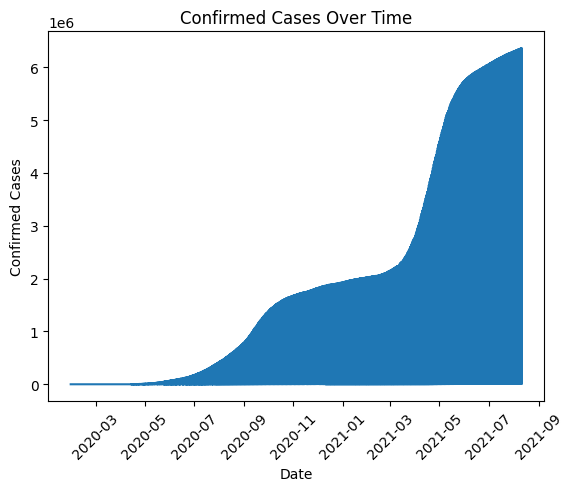

In [26]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3.sort_values('Date', inplace=True)
plt.plot(df3['Date'], df3['Confirmed'])
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

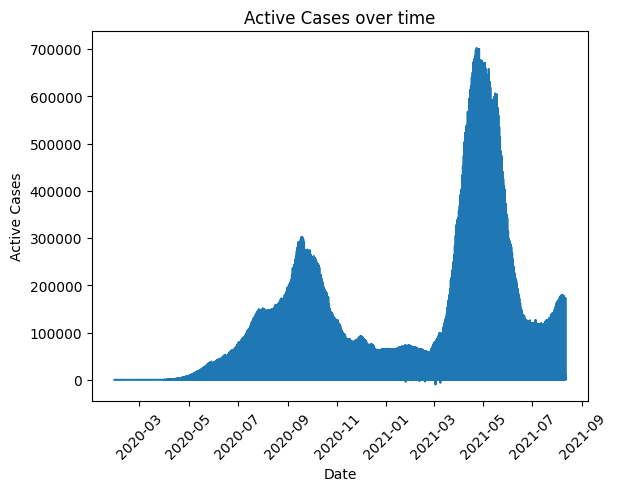

In [27]:
df3['Date'] = pd.to_datetime(df['Date'])
df3.sort_values('Date', inplace=True)
plt.plot(df3['Date'], df3['Active_cases'])
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases over time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

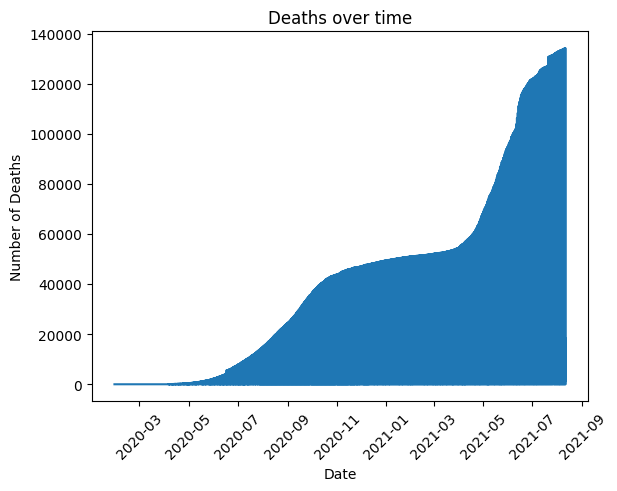

In [28]:
df3['Date'] = pd.to_datetime(df['Date'])
df3.sort_values('Date', inplace=True)
plt.plot(df3['Date'], df3['Deaths'])
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Deaths over time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()